In [1]:
!pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from scipy.io import wavfile
import os
from IPython.display import Audio, display
import noisereduce as nr
from scipy.fft import fft, fftfreq
from scipy.signal import butter, sosfiltfilt
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = os.getcwd()
file_path = os.path.join(path,'0.wav')
rate, audio = wavfile.read(file_path)
length = audio.shape[0] / rate
length #seconds

0.352375

In [3]:
Audio(data=audio, rate=rate)

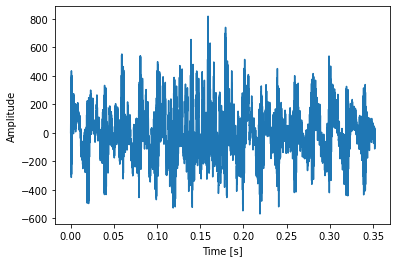

In [4]:
#time domain
time = np.linspace(0., length, audio.shape[0])
plt.plot(time, audio)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


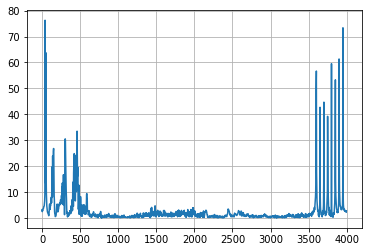

In [5]:
#frequncy domain
N = audio.shape[0]
T = 1.0 / rate
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(audio)
xf = fftfreq(N, T)[:N//2] 
#half of the whole frequency range is plotted
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

### case 1: apply noise reduction first and then bandpass filter

In [5]:
reduced_noise = nr.reduce_noise(y = audio, sr=rate,stationary=True,n_fft=128)

In [6]:
Audio(data=reduced_noise, rate=rate)

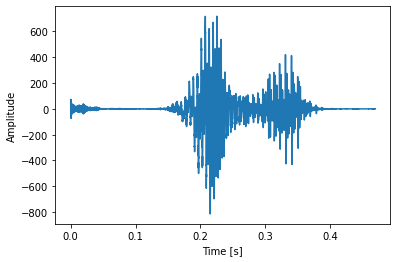

In [7]:
plt.plot(time,reduced_noise)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


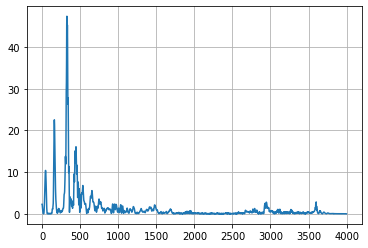

In [8]:

N = reduced_noise.shape[0]
T = 1.0 / rate
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(reduced_noise)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()


In [23]:
#butterworth bandpass filter order=4
sos = butter(4, [50, 3500], analog=False,fs=rate, btype='band', output='sos')
filtered = sosfiltfilt(sos, reduced_noise)

In [24]:
Audio(data=filtered, rate=rate)

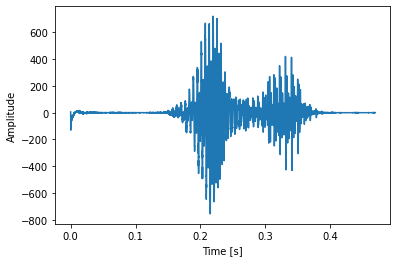

In [25]:
plt.plot(time,filtered)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


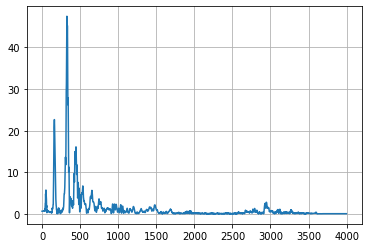

In [26]:
N = filtered.shape[0]
T = 1.0 / rate
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(filtered)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [28]:
reduced_noise[:20] #values of first samples after noise reduction

array([ 72, -53,  22,  13, -45,  66, -74,  70, -55,  35, -13,  -3,  15,
       -23,  29, -34,  38, -39,  36, -30], dtype=int16)

In [27]:
filtered[:20] # a peak of -130 occured at sample 2 after applying the filter

array([   5.39119908, -129.99066544,  -17.83071192,  -82.30162463,
        -64.18276586,  -38.54831627,  -84.06948555,  -30.49705235,
        -69.97662343,  -47.95640394,  -44.57195738,  -59.73932131,
        -38.01757871,  -53.04058741,  -41.66043223,  -45.10160143,
        -39.52753817,  -43.99788793,  -34.91490762,  -41.89439234])

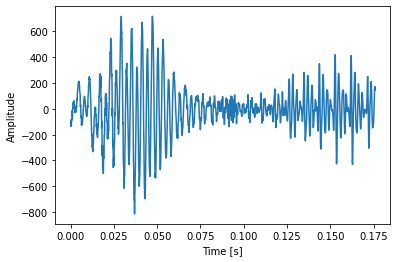

In [51]:
start = 0
end = len(reduced_noise)

for idx, point in enumerate(reduced_noise):
    if abs(point) > 100:
        start = idx
        break

# Reverse the array for trimming the end
for idx, point in enumerate(reduced_noise[::-1]):
    if abs(point) > 100:
        end = len(audio) - idx
        break
final = reduced_noise[start:end]

time = np.linspace(0., (end-start)/rate, final.shape[0])
plt.plot(time, final)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


In [52]:
final.shape[0]

1407

### case 2: apply bandpass filter and then use noise reduction

In [6]:
sos2 = butter(10, [50, 3500], analog=False,fs=rate, btype='band', output='sos')
filtered2 = sosfiltfilt(sos2, audio)
Audio(data=filtered2, rate=rate)

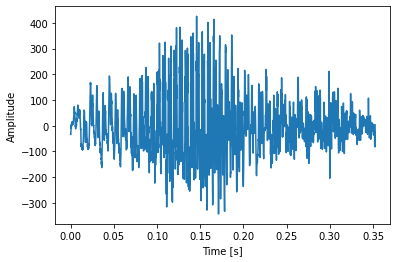

In [7]:
plt.plot(time,filtered2)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

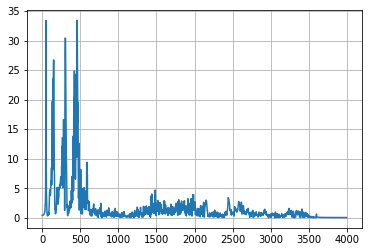

In [8]:
N = filtered2.shape[0]
T = 1.0 / rate
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(filtered2)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [17]:
reduced_noise2 = nr.reduce_noise(y = filtered2, sr=rate,stationary=True,n_fft=128)
Audio(data=reduced_noise2, rate=rate)

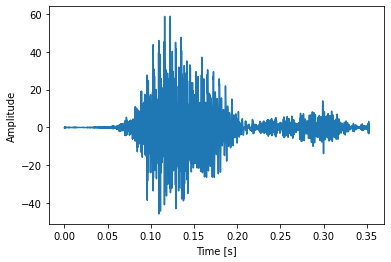

In [18]:
plt.plot(time,reduced_noise2)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

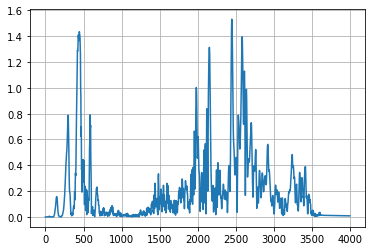

In [19]:
N = reduced_noise2.shape[0]
T = 1.0 / rate
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(reduced_noise2)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()


In [21]:
max(reduced_noise2)

58.80300151853248

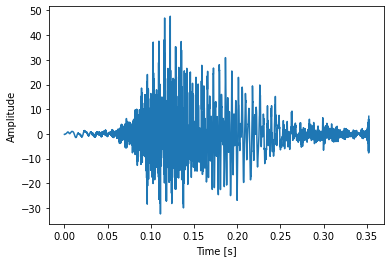

In [15]:
start = 0
end = len(reduced_noise2)

for idx, point in enumerate(reduced_noise2):
    if abs(point) > 50: #first sample which is greater that 50 is the start point
        start = idx
        break

# Reverse the array for trimming the end
for idx, point in enumerate(reduced_noise2[::-1]):
    if abs(point) > 50: #last sample which is greater that 50 is the end point
        end = len(audio) - idx
        break
final2 = reduced_noise2[start:end]

time = np.linspace(0., (end-start)/rate, final2.shape[0])
plt.plot(time, final2)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [20]:
max(final2)

47.62015375648903

### 1

In [6]:
path = os.getcwd()
file_path = os.path.join(path,'8.wav')
rate, audio = wavfile.read(file_path)
length = audio.shape[0] / rate
Audio(data=audio, rate=rate)

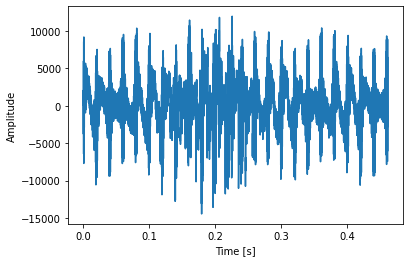

In [7]:
#time domain
time = np.linspace(0., length, audio.shape[0])
plt.plot(time, audio)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

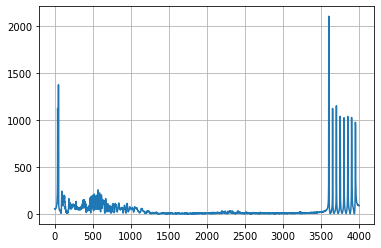

In [8]:
#frequncy domain
N = audio.shape[0]
T = 1.0 / rate
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(audio)
xf = fftfreq(N, T)[:N//2] 
#half of the whole frequency range is plotted
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [23]:
sos2 = butter(10, [50, 3500], analog=False,fs=rate, btype='band', output='sos')
filtered2 = sosfiltfilt(sos2, audio)
Audio(data=filtered2, rate=rate)

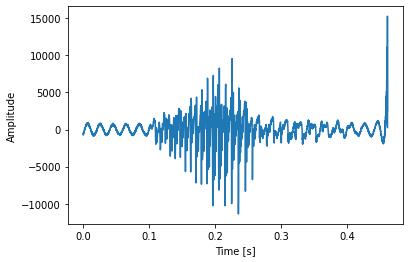

In [24]:
plt.plot(time,filtered2)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

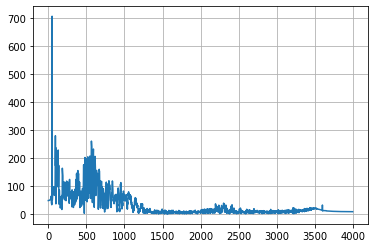

In [25]:
N = filtered2.shape[0]
T = 1.0 / rate
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(filtered2)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [26]:
reduced_noise2 = nr.reduce_noise(y = filtered2, sr=rate,stationary=True,n_fft=128)
Audio(data=reduced_noise2, rate=rate)

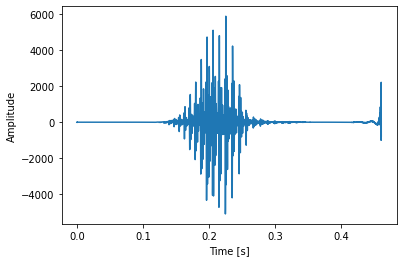

In [27]:
plt.plot(time,reduced_noise2)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

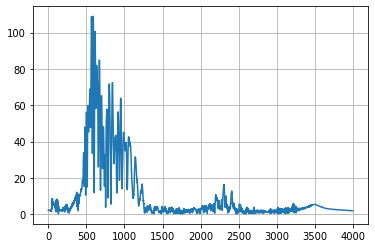

In [28]:
N = reduced_noise2.shape[0]
T = 1.0 / rate
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(reduced_noise2)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

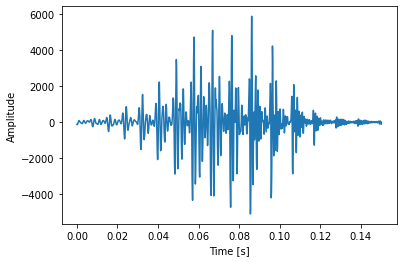

In [31]:
start = 0
end = len(reduced_noise2)

for idx, point in enumerate(reduced_noise2):
    if abs(point) > 100: #first sample which is greater that 50 is the start point
        if idx > 300:
          start = idx
          break

# Reverse the array for trimming the end
for idx, point in enumerate(reduced_noise2[::-1]):
    if abs(point) > 100: #last sample which is greater that 50 is the end point
        if idx > 300:
          end = len(audio) - idx
          break
final2 = reduced_noise2[start:end]

time = np.linspace(0., (end-start)/rate, final2.shape[0])
plt.plot(time, final2)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [32]:
final2.shape[0]

1201

### 8

In [125]:
path = os.getcwd()
file_path = os.path.join(path,'128.wav')
rate, audio = wavfile.read(file_path)
length = audio.shape[0] / rate
Audio(data=audio, rate=rate)

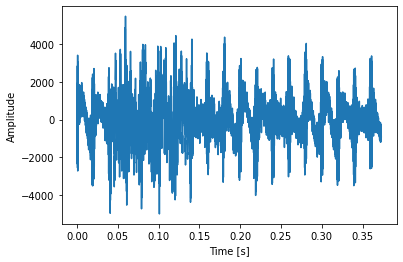

In [126]:
#time domain
time = np.linspace(0., length, audio.shape[0])
plt.plot(time, audio)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

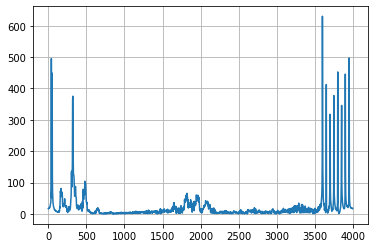

In [127]:
#frequncy domain
N = audio.shape[0]
T = 1.0 / rate
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(audio)
xf = fftfreq(N, T)[:N//2] 
#half of the whole frequency range is plotted
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [128]:
sos2 = butter(10, [75, 3500], analog=False,fs=rate, btype='band', output='sos')
filtered2 = sosfiltfilt(sos2, audio)
Audio(data=filtered2, rate=rate)

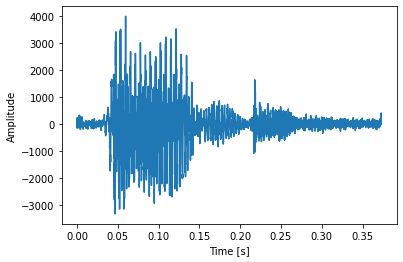

In [129]:
plt.plot(time,filtered2)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

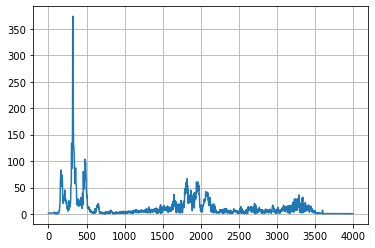

In [130]:
N = filtered2.shape[0]
T = 1.0 / rate
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(filtered2)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [131]:
reduced_noise2 = nr.reduce_noise(y = filtered2, sr=rate,stationary=True,n_fft=256)
Audio(data=reduced_noise2, rate=rate)

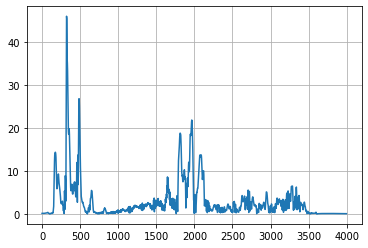

In [132]:
N = reduced_noise2.shape[0]
T = 1.0 / rate
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(reduced_noise2)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

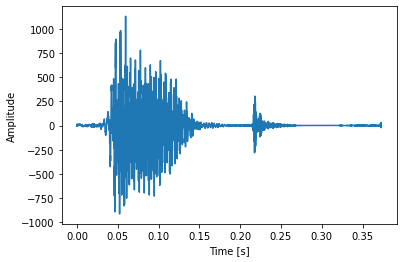

In [133]:
plt.plot(time,reduced_noise2)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

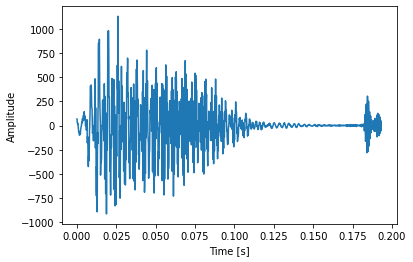

In [135]:
start = 0
end = len(reduced_noise2)

for idx, point in enumerate(reduced_noise2):
    if abs(point) > 50: #first sample which is greater that 50 is the start point
        if idx > 100:
          start = idx
          break

# Reverse the array for trimming the end
for idx, point in enumerate(reduced_noise2[::-1]):
    if abs(point) > 50: #last sample which is greater that 50 is the end point
        if idx > 300:
          end = len(audio) - idx
          break
final2 = reduced_noise2[start:end]

time = np.linspace(0., (end-start)/rate, final2.shape[0])
plt.plot(time, final2)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [105]:
reduced_noise = nr.reduce_noise(y = audio, sr=rate,stationary=True,n_fft=256)
Audio(data=reduced_noise, rate=rate)

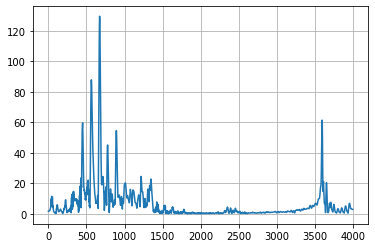

In [106]:
N = reduced_noise.shape[0]
T = 1.0 / rate
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(reduced_noise)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

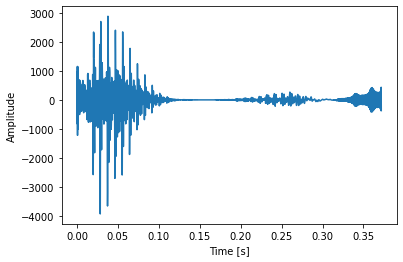

In [107]:
plt.plot(time,reduced_noise)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

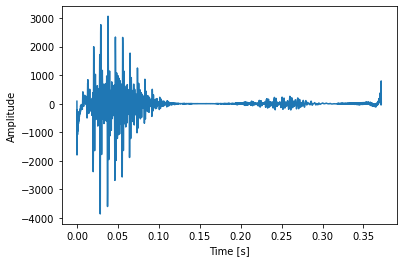

In [108]:
sos = butter(4, [50, 3500], analog=False,fs=rate, btype='band', output='sos')
filtered = sosfiltfilt(sos, reduced_noise)
plt.plot(time,filtered)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()